<a href="https://colab.research.google.com/github/alexalra/Portfolio-Alejandro/blob/main/1.%20EDA%20with%20Python%20(Pandas)%20World_Bank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Intro

This project is used to showcase my Python expertise in my portfolio. I utilize Pandas to clean and prepare the dataset and conduct exploratory data analysis (EDA) in an World Bank World Development Indicators dataset. The process involves:

A) Data inspection

B) Data cleaninng and manipulation

C) Numerical summarization

D) Correlations

The dataset contains data about World Development Indicators measured from 1960 to 2023, extracted from the World Bank database. It includes macro-economical, social, political and environmental data from all the countries and regions the world bank has data about.

The dataset is courtesy of the [Kaggle](https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators).

In [1]:
#Upload the csv file

from google.colab import files

uploaded = files.upload()

Saving world_bank_development_indicators.csv to world_bank_development_indicators.csv


In [2]:
#Read the csv file

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['world_bank_development_indicators.csv']))




# 1. Data inspection

In [34]:
#Let's get a glimpse of the dataset

df.head()

,country,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


### 1.1 DF size and characteristics

In [6]:
#Let's see the size of the dataset

df.shape


(17272, 50)

In [ ]:
#Let's see which values are missing

missing_values = df.isna().sum()
percentage_missing = (df.isna().sum() / len(df)) *100

print(missing_values.sort_values(ascending = True))
print(percentage_missing.sort_values(ascending = True))

The dataset is composed of 17272 rows and 50 columns.

There are a lot of missing values. Only a few columns have less than 20% of values missing (out of the total they have). We will use only those columns for our calculations.

In the next section, I will identify these columns and create a new dataframe that excludes all the columns missing more than 20% of the values.



















### 1.2 Data types

In [4]:
#Let's see the different data types of the DF

df.dtypes

,0
country,object
date,object
agricultural_land%,float64
forest_land%,float64
land_area,float64
avg_precipitation,float64
trade_in_services%,float64
control_of_corruption_estimate,float64
control_of_corruption_std,float64
access_to_electricity%,float64


It appears that all numerical values have been stored as float. However, there are multiple columns that contain discrete variables (measured in full numbers) that would benefit from being stored as an integer. For example, the column called "interntional_homicides", there is not such a thing as 1.5 homicides, so there's no reason for storing it as a float.

In the next section, I will change the data types of those columns with less than 20% of values missing if necessary.

# 2. Data cleaning and manipulation


### 2.2 Handling missing data

In [5]:
#Let's create a DF that includes only the columns missing less than 20% of the values.

filtered_columns = percentage_missing.reset_index()

filtered_columns.columns = ["Column_name", "Percentage_missing"]

final_filtered_columns = filtered_columns[(filtered_columns["Percentage_missing"] < 20)].sort_values(by = "Percentage_missing", ascending = True).reset_index(drop=True)

print(final_filtered_columns)


                Column_name  Percentage_missing
0                   country            0.000000
1                      date            0.000000
2                population            3.514358
3          rural_population            4.243863
4                birth_rate            7.150301
5                death_rate            7.254516
6  life_expectancy_at_birth            8.140343
7                 land_area           13.559518
8        population_density           13.727420
9        agricultural_land%           14.810097


In [6]:
#Let's extract a list with the name of the columns missing less than 20% of the values.

filtered_columns = percentage_missing.reset_index()

final_list = final_filtered_columns["Column_name"].tolist()

print(final_list)

['country', 'date', 'population', 'rural_population', 'birth_rate', 'death_rate', 'life_expectancy_at_birth', 'land_area', 'population_density', 'agricultural_land%']


In [7]:
#Now that we have a list with the names of all columns missing less than 20% of the values.
# I will create a new DF -deriving from the original one- that includes only these columns

project_df = df[['country', 'date', 'population', 'rural_population', 'birth_rate', 'death_rate', 'life_expectancy_at_birth', 'land_area', 'population_density', 'agricultural_land%']]

project_df.head()

,country,date,population,rural_population,birth_rate,death_rate,life_expectancy_at_birth,land_area,population_density,agricultural_land%
0,Afghanistan,1960-01-01,8622466.0,7898093.0,50.340,31.921,32.535,NaN,NaN,NaN
1,Afghanistan,1961-01-01,8790140.0,8026804.0,50.443,31.349,33.068,652230.0,13.477056,57.878356
2,Afghanistan,1962-01-01,8969047.0,8163985.0,50.570,30.845,33.547,652230.0,13.751356,57.955016
3,Afghanistan,1963-01-01,9157465.0,8308019.0,50.703,30.359,34.016,652230.0,14.040239,58.031676
4,Afghanistan,1964-01-01,9355514.0,8458694.0,50.831,29.867,34.494,652230.0,14.343888,58.116002


### 2.2 Handling wrong data types

In [35]:
#Let's review the data types of our new dataframe and whether any modification is needed

project_df.dtypes

,0
country,object
population,float64
rural_population,float64
birth_rate,float64
death_rate,float64
life_expectancy_at_birth,float64
land_area,float64
population_density,float64
agricultural_land%,float64
year,int32


It appears that the "date" column has been stored as an object. It should instead be a date. All the other columns are float, and it makes sense given the nature of the variables they store.


In [ ]:
#Let's change "date" data type.

project_df["date"] = project_df["date"].astype("datetime64[ns]")

project_df.dtypes

It appears that all dates follow the same format "dd-mm-year", where day and month are "01" always. Therefore, only the year is useful in our calculations. Let's drop the day and month, and keep only the year.


In [ ]:
#Let's create a new column with only the year, and delete "date"

project_df["year"] = project_df["date"].dt.year

project_df.drop("date", axis = 1, inplace = True)

project_df.head()

# 3. Numerical summarization


### 3.1 Life expectancy at birth

In this section, we will focus on analysing data from one of the columns of our DF, life expectancy at birth.

In [23]:
#Let's calculate the top 5 countries with the largest life expectancy at birth and the last 5 in the list.

project_df.head()

life_expectancy = project_df.groupby("country")["life_expectancy_at_birth"].mean()

life_expectancy= life_expectancy.reset_index()

life_expectancy.rename(columns={"life_expectancy_at_birth":"life_expectancy_at_birth_mean"}, inplace= True)

life_expectancy = life_expectancy.sort_values(by="life_expectancy_at_birth_mean", ascending= False).reset_index(drop= True)

#Let's see the 5 countries with the largest life expectancy at birth

life_expectancy.head(5)

,country,life_expectancy_at_birth_mean
0,Cayman Islands,82.190244
1,Liechtenstein,80.799739
2,Faroe Islands,79.015661
3,Iceland,78.258861
4,Japan,78.037360


In [24]:
#Let's see the 5 countries with the lowest life expectancy at birth

life_expectancy_clean = life_expectancy.dropna()

life_expectancy_clean.tail(5)

,country,life_expectancy_at_birth_mean
255,Nigeria,45.966306
256,Chad,45.494694
257,Sierra Leone,45.398129
258,Mali,45.347629
259,South Sudan,39.101194


### 3.2 Main statistics for life expectancy at birth

In [37]:
#Let's provide a statistical summary of the DataFrame and analyse the results.

project_df["life_expectancy_at_birth"].describe(include = "all")


,life_expectancy_at_birth
count,15866.000000
mean,64.254193
std,11.112156
min,11.995000
25%,56.810602
50%,66.776719
75%,72.568000
max,85.497561


It appears that the mean for the life expectancy at birth for all the countries present in the dataset is 64.25 with a standard deviation from the mean of 11.11, implying a moderate variation in life expectancy among the countries in the dataset.

There seems to be also pretty big outliers, with the min life expectancy being 11.99 and the max 85.49

Let's visualise the mean to understand its spread.

### 3.3 Data visualization

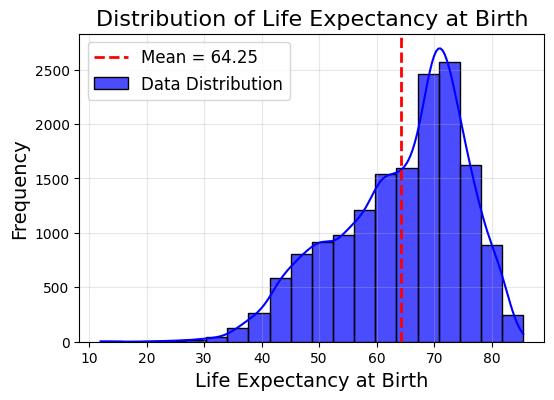

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = project_df["life_expectancy_at_birth"]

# Let's first plot histogram with the mean

plt.figure(figsize=(6, 4))
sns.histplot(plot_df, kde=True, bins=20, color="blue", alpha=0.7, label="Data Distribution")

# Let's add the mean line
mean_value = plot_df.mean()
plt.axvline(mean_value, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_value:.2f}")

# Let's customize the plot
plt.title("Distribution of Life Expectancy at Birth", fontsize=16)
plt.xlabel("Life Expectancy at Birth", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()


Based on the visualisation, it appears that there's a right-skewed distribution of the mean of life expectancy at birth. When the data is skewed like in this case, the mean may not be the best measure of a typical observation.

Let's therefore opt for more robust statistical measures like the median or IQR which are NOT heavily influenced by extreme values.



### 3.4 Mean and IQRs

In [32]:
#Let's calculate the median and IQRs

median = project_df["life_expectancy_at_birth"].median()
Q1= project_df["life_expectancy_at_birth"].quantile(0.25)
Q3= project_df["life_expectancy_at_birth"].quantile(0.75)

print(round(median, 2))
print(round(Q1, 2))
print(round(Q3, 2))

66.78
56.81
72.57


The median life expectancy is 66.78 years. The median is higher than the mean (64.25), which explains why the histogram is right-skewed. That is because some countries might have unsually high or low life expectancies. Now we know that 50% of the countries have a life expectancy at birth above this value, and 50% have a value below it.

We also know that 50% of the values are between 56.81 and 72.57 years of life expectancy.

Such results are not shocking after seeing the top 5 and last 5 countries at the beginning of this exercise. While some countries have a life expectancy above 80 years, others have it slightly above 40 years.

# 4. Correlations


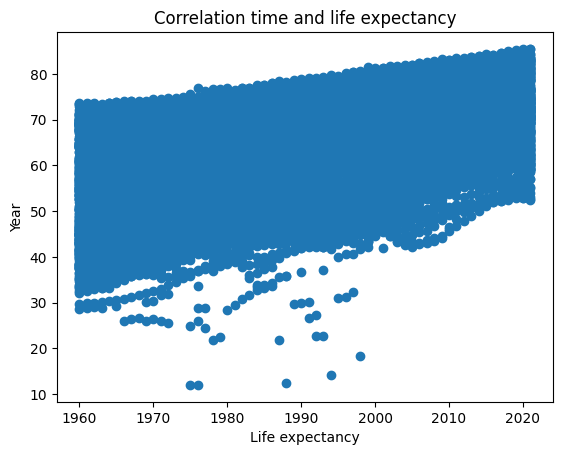

In [18]:
#Let's look at the correlation of life expectancy with other variables from the main dataset.

# For example, is life expectancy correlated with the year in which the babies were born? Has life expectancy increased along with time?

import matplotlib.pyplot as plt

plt.scatter(project_df["year"], project_df["life_expectancy_at_birth"])

# Add a title and labels
plt.title('Correlation time and life expectancy')
plt.xlabel('Life expectancy')
plt.ylabel('Year')

# Show the plot
plt.show()




In the visulisation, it appears that life expectancy has generally increased with time, given the growing tendency towards the right of the plot.

Nonetheless, to be certain about the correlation between both variables, let's calculate the correlation coefficient.

In [22]:
correlation_coefficient = project_df['year'].corr(project_df['life_expectancy_at_birth'])

print(correlation_coefficient)

0.4868616453014436


The coefficient returned 0.48, which can be interpreted as a low/moderate correlation. As time goes on, life expectancy also increases. Nonetheless, the correlation is not strong.

This is the end of the Exploratory Data Analysis. Thanks to it, we cleaned and manipulated data to make it easier for the subsequent data analysis. We summarised some of the results statistically, visualised them and look for correlations.